# The Problem:

### a ride-hailing company wants to increase their requests in February, March and December.

# Solution:

### classify the peak time on the peak days.

# Deliverables:

### - Determine the peak time on the peak days for each station.
### - collecting the most crowded stations depending on the daily entries. 
### - How to distribute the cars.


# Tools

- sqlite
- python libraries (pandas, numpy, os)
- python visualization libraries (seaborn, matblotlip)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import os
import datetime

In [2]:
def get_data(week_nums):
    URL="http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs=[]
    for week in week_nums:
        file_url= URL.format(week)
        dfs.append(pd.read_csv(file_url))
        return pd.concat(dfs)
week_nums=[170204,170211,170218,170225,170304,170311,170318,170325,171202,171209,171216,171223]
TurnstileDF= get_data(week_nums)

In [3]:
TurnstileDF.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,03:00:00,REGULAR,6027537,2042054
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,07:00:00,REGULAR,6027546,2042069
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,11:00:00,REGULAR,6027610,2042207
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,15:00:00,REGULAR,6027813,2042283
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,19:00:00,REGULAR,6028198,2042346


In [4]:
TurnstileDF.shape

(194642, 11)

In [5]:
TurnstileDF["DATE_TIME"] = pd.to_datetime(TurnstileDF.DATE + " " + TurnstileDF.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

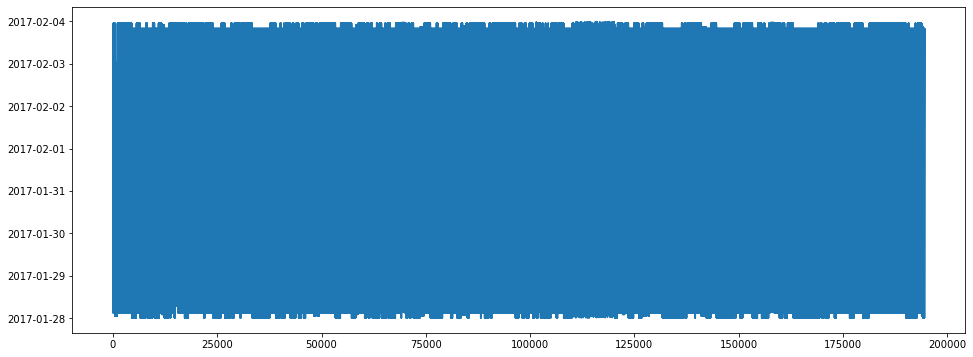

In [36]:
TurnstileDF["DATE_TIME"].plot(figsize=(16, 6));

In [18]:
TurnstileDF.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,03:00:00,REGULAR,6027537,2042054,2017-01-28 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,07:00:00,REGULAR,6027546,2042069,2017-01-28 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,11:00:00,REGULAR,6027610,2042207,2017-01-28 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,15:00:00,REGULAR,6027813,2042283,2017-01-28 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,19:00:00,REGULAR,6028198,2042346,2017-01-28 19:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,23:00:00,REGULAR,6028394,2042371,2017-01-28 23:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,03:00:00,REGULAR,6028450,2042383,2017-01-29 03:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,07:00:00,REGULAR,6028464,2042394,2017-01-29 07:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,11:00:00,REGULAR,6028518,2042464,2017-01-29 11:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,15:00:00,REGULAR,6028676,2042529,2017-01-29 15:00:00


In [6]:
(TurnstileDF
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
131594,R158,R084,00-06-00,59 ST COLUMBUS,2017-01-31 03:00:00,2
129765,R148,R033,01-00-01,TIMES SQ-42 ST,2017-02-03 07:00:00,1
129756,R148,R033,01-00-01,TIMES SQ-42 ST,2017-02-01 19:00:00,1
129757,R148,R033,01-00-01,TIMES SQ-42 ST,2017-02-01 23:00:00,1
129758,R148,R033,01-00-01,TIMES SQ-42 ST,2017-02-02 03:00:00,1


In [7]:
mask = ((TurnstileDF["C/A"] == "R158") & 
(TurnstileDF["UNIT"] == "R084") & 
(TurnstileDF["SCP"] == "00-06-00") & 
(TurnstileDF["STATION"] == "59 ST COLUMBUS") &
(TurnstileDF["DATE_TIME"].dt.date == datetime.datetime(2017,1, 31).date()))

TurnstileDF[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
131594,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/31/2017,03:00:00,REGULAR,1262161,280489,2017-01-31 03:00:00
131595,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/31/2017,03:00:00,RECOVR AUD,1262161,13977513,2017-01-31 03:00:00
131596,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/31/2017,07:00:00,REGULAR,1262163,280542,2017-01-31 07:00:00
131597,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/31/2017,11:00:00,REGULAR,1262205,280929,2017-01-31 11:00:00
131598,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/31/2017,15:00:00,REGULAR,1262296,281044,2017-01-31 15:00:00


In [8]:
TurnstileDF.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
TurnstileDF.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [9]:
TurnstileDF

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
194641,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/03/2017,20:00:00,REGULAR,5554,285,2017-02-03 20:00:00
194640,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/03/2017,16:00:00,REGULAR,5554,285,2017-02-03 16:00:00
194639,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/03/2017,12:00:00,REGULAR,5554,285,2017-02-03 12:00:00
194638,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/03/2017,08:00:00,REGULAR,5554,285,2017-02-03 08:00:00
194637,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/03/2017,04:00:00,REGULAR,5554,285,2017-02-03 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,19:00:00,REGULAR,6028198,2042346,2017-01-28 19:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,15:00:00,REGULAR,6027813,2042283,2017-01-28 15:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,11:00:00,REGULAR,6027610,2042207,2017-01-28 11:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,07:00:00,REGULAR,6027546,2042069,2017-01-28 07:00:00


In [10]:
(TurnstileDF
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2017-01-28 03:00:00,1
129765,R148,R033,01-00-01,TIMES SQ-42 ST,2017-02-03 07:00:00,1
129756,R148,R033,01-00-01,TIMES SQ-42 ST,2017-02-01 19:00:00,1
129757,R148,R033,01-00-01,TIMES SQ-42 ST,2017-02-01 23:00:00,1
129758,R148,R033,01-00-01,TIMES SQ-42 ST,2017-02-02 03:00:00,1


In [11]:
TurnstileDF.isna().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
DATE_TIME                                                               0
dtype: int64

In [12]:
TurnstileDF.shape

(194641, 12)

In [13]:
TurnstileDF_daily = (TurnstileDF
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [14]:
TurnstileDF_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/28/2017,6028394
1,A002,R051,02-00-00,59 ST,01/29/2017,6029097
2,A002,R051,02-00-00,59 ST,01/30/2017,6030636
3,A002,R051,02-00-00,59 ST,01/31/2017,6032180
4,A002,R051,02-00-00,59 ST,02/01/2017,6033688


In [15]:
TurnstileDF_daily[["PREV_DATE", "PREV_ENTRIES"]] = (TurnstileDF_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-15-4691a3b3498f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  TurnstileDF_daily[["PREV_DATE", "PREV_ENTRIES"]] = (TurnstileDF_daily


In [16]:
TurnstileDF_daily.shape

(32347, 8)

In [33]:
TurnstileDF_daily[TurnstileDF_daily["ENTRIES"] < TurnstileDF_daily["PREV_ENTRIES"]].head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
239,A011,R080,01-00-00,57 ST-7 AV,01/29/2017,887274807,01/28/2017,887276535.0
240,A011,R080,01-00-00,57 ST-7 AV,01/30/2017,887271988,01/29/2017,887274807.0
241,A011,R080,01-00-00,57 ST-7 AV,01/31/2017,887268786,01/30/2017,887271988.0
242,A011,R080,01-00-00,57 ST-7 AV,02/01/2017,887265622,01/31/2017,887268786.0
243,A011,R080,01-00-00,57 ST-7 AV,02/02/2017,887262166,02/01/2017,887265622.0


In [17]:
(TurnstileDF_daily[TurnstileDF_daily["ENTRIES"] < TurnstileDF_daily["PREV_ENTRIES"]]
.groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())


C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         6
A025   R023  01-03-01  34 ST-HERALD SQ    2
             01-03-02  34 ST-HERALD SQ    6
A049   R088  02-05-00  CORTLANDT ST       5
A066   R118  00-00-00  CANAL ST           6
C019   R232  00-00-02  45 ST              6
H003   R163  01-00-02  6 AV               6
H023   R236  00-06-00  DEKALB AV          6
J034   R007  00-00-02  104 ST             6
K026   R100  00-00-01  METROPOLITAN AV    6
N063A  R011  00-00-04  42 ST-PORT AUTH    6
             00-00-05  42 ST-PORT AUTH    6
             00-00-08  42 ST-PORT AUTH    6
N078   R175  01-03-00  14 ST              6
N111   R284  00-06-01  CLINTON-WASH AV    6
N120A  R153  01-06-00  UTICA AV           1
N137   R354  00-06-01  104 ST             6
N203   R195  00-00-01  161/YANKEE STAD    6
N305   R017  01-03-04  LEXINGTON AV/53    6
N327   R254  00-06-01  GRAND-NEWTOWN      6
N336   R158  00-03-00  KEW GARDENS        1
N342   R019  01-03-02  JAMAICA 179 ST

In [20]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter: 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
TurnstileDF_daily["DAILY_ENTRIES"] = TurnstileDF_daily.apply(get_daily_counts, axis=1, max_counter=1000000)


1241453652 11978209.0
824640994 7076792.0
882 1941584.0
2476 2567690.0
634 4208028.0


In [19]:
TurnstileDF_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,01/28/2017,6028394,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/29/2017,6029097,01/28/2017,6028394.0,703.0
2,A002,R051,02-00-00,59 ST,01/30/2017,6030636,01/29/2017,6029097.0,1539.0
3,A002,R051,02-00-00,59 ST,01/31/2017,6032180,01/30/2017,6030636.0,1544.0
4,A002,R051,02-00-00,59 ST,02/01/2017,6033688,01/31/2017,6032180.0,1508.0
...,...,...,...,...,...,...,...,...,...
32342,TRAM2,R469,00-05-01,RIT-ROOSEVELT,01/30/2017,5554,01/29/2017,5554.0,0.0
32343,TRAM2,R469,00-05-01,RIT-ROOSEVELT,01/31/2017,5554,01/30/2017,5554.0,0.0
32344,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/01/2017,5554,01/31/2017,5554.0,0.0
32345,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/02/2017,5554,02/01/2017,5554.0,0.0


In [22]:
TurnstileDF_daily.dropna(subset= ["PREV_ENTRIES"], axis=0, inplace= True)

In [24]:
TurnstileDF_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/29/2017,6029097,01/28/2017,6028394.0,703.0
2,A002,R051,02-00-00,59 ST,01/30/2017,6030636,01/29/2017,6029097.0,1539.0
3,A002,R051,02-00-00,59 ST,01/31/2017,6032180,01/30/2017,6030636.0,1544.0
4,A002,R051,02-00-00,59 ST,02/01/2017,6033688,01/31/2017,6032180.0,1508.0
5,A002,R051,02-00-00,59 ST,02/02/2017,6035349,02/01/2017,6033688.0,1661.0
...,...,...,...,...,...,...,...,...,...
32342,TRAM2,R469,00-05-01,RIT-ROOSEVELT,01/30/2017,5554,01/29/2017,5554.0,0.0
32343,TRAM2,R469,00-05-01,RIT-ROOSEVELT,01/31/2017,5554,01/30/2017,5554.0,0.0
32344,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/01/2017,5554,01/31/2017,5554.0,0.0
32345,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/02/2017,5554,02/01/2017,5554.0,0.0
